In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# tau 3 g 0.9879271228182775
def apply_delay(x, n):
    if n >= len(x):
        return np.zeros_like(x)
    zeros = np.zeros(n, dtype=x.dtype)
    return np.concatenate((zeros, x[:-n]))
    
def analysis_cancellation(ipsi, cont, tau, g):
    r_ipsi = ipsi + apply_delay(cont, tau) * g
    r_cont = cont + apply_delay(ipsi, tau) * g
    w, R_ipsi = signal.freqz(r_ipsi, worN=4096)
    w, R_cont = signal.freqz(r_cont, worN=4096)
    FDR_cancellation = np.abs(R_ipsi) / np.abs(R_cont)

    return FDR_cancellation

def analysis_coloration(ipsi, cont, sample_rate):
    w, h_ipsi = signal.freqz(ipsi, 1, fs=sample_rate)
    w, h_cont = signal.freqz(cont, 1, fs=sample_rate)
    si = np.abs(h_ipsi + h_cont)
    so = np.abs(h_ipsi - h_cont)

    return np.maximum(si, so)

In [3]:
tau = 3
g = 0.9879271228182775
fs = 48000

In [4]:
# Load ipsilateral and contralateral filter coefficients
ipsi_data = np.loadtxt('ipsi54cm198cm.csv')
cont_data = np.loadtxt('cont54cm198cm.csv')
center = (len(cont_data)-1) // 2

# Load ipsilateral and contralateral filter coefficients
ipsi_data512 = np.loadtxt('ipsi54cm198cm512.csv')
cont_data512 = np.loadtxt('cont54cm198cm512.csv')

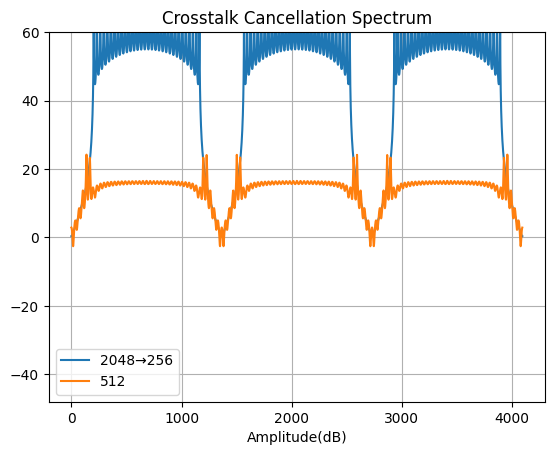

In [10]:
native2048           = analysis_cancellation(ipsi_data, cont_data, tau, g)
native2048cropped512 = analysis_cancellation(ipsi_data[center-256:center+256], cont_data[center-256:center+256], tau, g)
native2048cropped256 = analysis_cancellation(ipsi_data[center-128:center+128], cont_data[center-128:center+128], tau, g)
native512            = analysis_cancellation(ipsi_data512, cont_data512, tau, g)

plt.title('Crosstalk Cancellation Spectrum')
plt.plot(20 * np.log10(native2048), label="2048")
plt.plot(20 * np.log10(native2048cropped512), label="2048→512")
plt.plot(20 * np.log10(native2048cropped256), label="2048→256")
plt.plot(20 * np.log10(native512), label="512")
plt.legend()
plt.grid()
plt.ylim(-48, 60)
plt.xlabel("Radian Frequency(Omega)")
plt.xlabel("Amplitude(dB)")
plt.show()

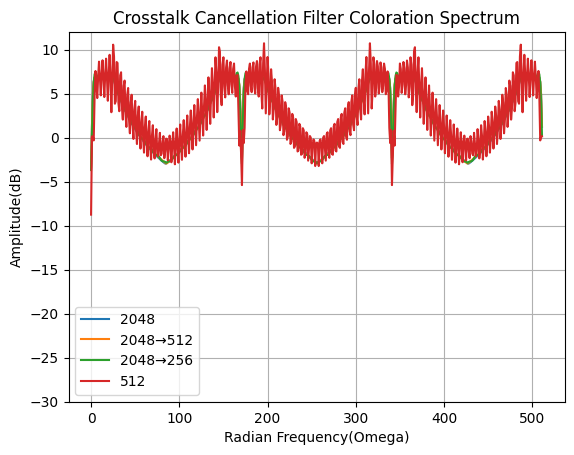

In [6]:
native2048           = analysis_coloration(ipsi_data, cont_data, fs)
native2048cropped512 = analysis_coloration(ipsi_data[center-256:center+256], cont_data[center-256:center+256], fs)
native2048cropped256 = analysis_coloration(ipsi_data[center-128:center+128], cont_data[center-128:center+128], fs)
native512            = analysis_coloration(ipsi_data512, cont_data512, fs)

plt.title('Crosstalk Cancellation Filter Coloration Spectrum')
plt.plot(20 * np.log10(native2048), label='2048')
plt.plot(20 * np.log10(native2048cropped512), label='2048→512')
plt.plot(20 * np.log10(native2048cropped256), label='2048→256')
plt.plot(20 * np.log10(native512), label='512')
plt.ylim(-30, 12)
plt.legend()
plt.grid()
plt.xlabel("Radian Frequency(Omega)")
plt.ylabel("Amplitude(dB)")
plt.show()

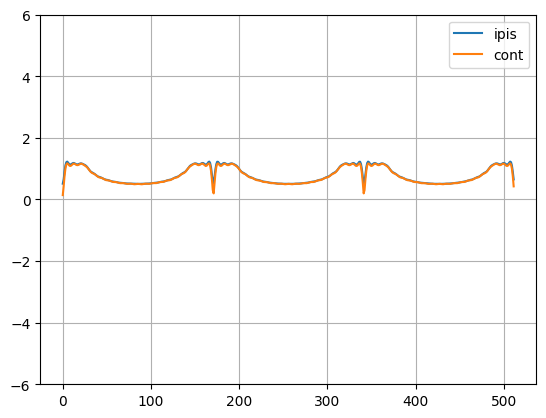

In [7]:
_, h1 = signal.freqz(ipsi_data[center-128:center+128])
_, h2 = signal.freqz(cont_data[center-128:center+128])
plt.plot(np.abs(h1), label='ipis')
plt.plot(np.abs(h2), label='cont')
plt.legend()
plt.ylim(-6, 6)
plt.grid()

In [10]:
import numpy as np
arr = np.array([0,1,2,3,4,5,6])
center = (len(arr)-1)//2
size = 2
print(arr[center-size:center+size+1])

[1 2 3 4 5]
